Code file for processing point data for Hospitals in Edinburgh. Data source = spacial hub (https://data.spatialhub.scot/dataset/nhs_hospitals-is/resource/b810d206-45bd-4dff-bac7-110a50b4bd3b)

Importing relevant packages

In [2]:
pip install geopandas as gpd

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [3]:
pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 11.2 MB/s eta 0:00:00


In [4]:
import geopandas as gpd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
NHS1 = gpd.read_file('/content/drive/MyDrive/GeospatialData/HospitalsScotland /pub_hosp.shp') # Update this path to your actual shapefile location on Google Drive

In [8]:
#random sample of data to investigate data descrepancies between NHS boards
NHS1.sample(10)

,sh_date_up,hbname,hbcode,sitecode,sitename,postcode,address,tenure,type,uprn,x,y,fid,geometry
241,2024-07-31,NHS Forth Valley,S08000019,ZZ19038,Bungalows 1-8 Larbert,FK5 4SD,Bungalows 1-8 Larbert,<Null>,<Null>,136072025,285588.0000,682367.0000,242.0,POINT (285588 682367)
106,2024-07-31,NHS Western Isles,S08000028,W107H,Western Isles Hospital,HS1 2AF,"Macaulay Road, Isle of Lewis, Stornoway",Owned,Acute Hospital,139013807,142692.0000,934195.0000,106.0,POINT (142692 934195)
217,2024-07-31,NHS Grampian,S08000020,N333H,Peterhead Community Hospital,AB42 2XB,"Links Terrace, Peterhead",Owned,Community Hospital,151085410,412467.0000,845814.0000,217.0,POINT (412467 845814)
151,2024-07-31,NHS Greater Glasgow and Clyde,S08000031,C410C,New Sneddon Street Clinic,PA3 2AD,"8 New Sneddon Street, Paisley",Owned,Clinics (Inc. Day Hospitals and Resource Centres),123065012,248374.0000,664313.0000,151.0,POINT (248374 664313)
66,2024-07-31,NHS Highland,S08000022,C122H,Community Equipment Store Campbeltown,PA28 6LE,"Ralston Road, Campbeltown",Owned,Community Hospital,125030510,172003.0000,619995.0000,66.0,POINT (172003 619995)
273,2024-07-31,NHS Lanarkshire,S08000032,L304H,Stonehouse Hospital,ML9 3NT,"Strathaven Road, Stonehouse",Leased,<Null>,484148024,274902.0000,646111.0000,274.0,POINT (274902 646111)
37,2024-07-31,NHS Borders,S08000016,B120H,Borders General Hospital Site,TD6 9BS,"Huntlyburn, Melrose",Owned and occupied by NHS Borders,"Acute Hospital, Education Centre & Residences",116051140,353342.0000,633789.0000,37.0,POINT (353342 633789)
296,2024-07-31,NHS Lothian,S08000024,S308H,St John's Hospital,EH54 6PP,"Howden Road West, Livingston",Owned,<Null>,135003711,304843.0215,667576.9725,297.0,POINT (304843.022 667576.973)
161,2024-07-31,NHS Greater Glasgow and Clyde,S08000031,G112H,Parkview Resource Centre,G32 7AX,"152 Wellshot Road, Glasgow",Owned,Clinics (Inc. Day Hospitals and Resource Centres),906700231365,263869.0000,663896.0000,161.0,POINT (263869 663896)
293,2024-07-31,NHS Lothian,S08000024,S305B,Howden Health Centre,EH54 6TP,"Howden West, Livingston, Lothian",Owned,<Null>,135009664,304860.9719,667679.0082,294.0,POINT (304860.972 667679.008)


<Axes: >

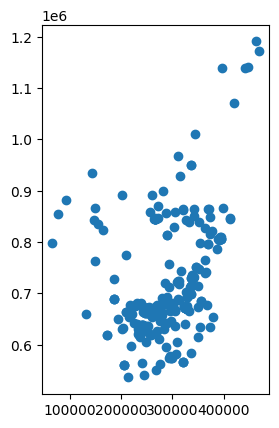

In [9]:
#initial plot of source data
NHS1.plot()

In [10]:
#Removed all hospitals not in Edinburgh. Also filtered out the Hospital in Linlithgow on 'Edinburgh Road'
edinburgh_hospitals = NHS1[NHS1['address'].str.contains('Edinburgh', case=False, na=False) &
                           ~NHS1['address'].str.contains('Linlithgow', case=False, na=False)]

# Display the first 10 rows of the filtered GeoDataFrame
edinburgh_hospitals.head(10)

,sh_date_up,hbname,hbcode,sitecode,sitename,postcode,address,tenure,type,uprn,x,y,fid,geometry
281,2024-07-31,NHS Lothian,S08000024,S033A,Woodburn Cottage,EH10 4SG,"56 Canaan Lane, Edinburgh",Owned,<Null>,906043092,324984.0001,671223.9875,282.0,POINT (324984 671223.987)
285,2024-07-31,NHS Lothian,S08000024,S114H,Royal Victoria Hospital,EH4 2DN,"13 Craigleith Road, Edinburgh",Owned,<Null>,906464895,323192.5624,674646.8078,286.0,POINT (323192.562 674646.808)
286,2024-07-31,NHS Lothian,S08000024,S116H,Western General Hospital,EH4 2XU,"Crewe Road South, Edinburgh",Owned,<Null>,906068839,323004.0078,674998.9558,287.0,POINT (323004.008 674998.956)
287,2024-07-31,NHS Lothian,S08000024,S201H,Astley Ainslie Hospital,EH9 2HB,"133 Grange Loan, Edinburgh",Owned,<Null>,906458436,325312.0888,671236.6642,288.0,POINT (325312.089 671236.664)
288,2024-07-31,NHS Lothian,S08000024,S009A,ATOS Building,EH10 4SG,"56 Cannan Lane, Edinburgh",Owned,<Null>,906043092,324984.0001,671223.9875,289.0,POINT (324984 671223.987)
289,2024-07-31,NHS Lothian,S08000024,HS001,Woodburn House,EH10 4SG,"54 Cannan Lane, Edinburgh",Owned,<Null>,906388543,324983.9702,671153.9654,290.0,POINT (324983.97 671153.965)
290,2024-07-31,NHS Lothian,S08000024,S209H,Liberton Hospital,EH16 6UB,"113 Lasswade Road, Edinburgh",Owned,<Null>,906462935,327952.0267,669029.0143,291.0,POINT (327952.027 669029.014)
291,2024-07-31,NHS Lothian,S08000024,S217H,Royal Edinburgh Hospital,EH10 5HF,"Morningside Place, Edinburgh",Owned,<Null>,906246615,324124.9748,671126.0137,292.0,POINT (324124.975 671126.014)
292,2024-07-31,NHS Lothian,S08000024,S232H,Cambridge Street Day Hospital,EH1 2DY,"5/7 Cambridge Street, Edinburgh",Owned,<Null>,906269242,324821.9794,673412.9906,293.0,POINT (324821.979 673412.991)
299,2024-07-31,NHS Lothian,S08000024,S313H,Ellens Glen House,EH16 6FF,"72 Carnbee Avenue, Edinburgh",PFI/NPD,<Null>,906045309,328228.0295,669092.9915,300.0,POINT (328228.03 669092.991)


In [11]:
#display hospitals in Edinburgh
edinburgh_hospitals.explore()

In [12]:
edinburgh_hospitals

,sh_date_up,hbname,hbcode,sitecode,sitename,postcode,address,tenure,type,uprn,x,y,fid,geometry
281,2024-07-31,NHS Lothian,S08000024,S033A,Woodburn Cottage,EH10 4SG,"56 Canaan Lane, Edinburgh",Owned,<Null>,906043092,324984.0001,671223.9875,282.0,POINT (324984 671223.987)
285,2024-07-31,NHS Lothian,S08000024,S114H,Royal Victoria Hospital,EH4 2DN,"13 Craigleith Road, Edinburgh",Owned,<Null>,906464895,323192.5624,674646.8078,286.0,POINT (323192.562 674646.808)
286,2024-07-31,NHS Lothian,S08000024,S116H,Western General Hospital,EH4 2XU,"Crewe Road South, Edinburgh",Owned,<Null>,906068839,323004.0078,674998.9558,287.0,POINT (323004.008 674998.956)
287,2024-07-31,NHS Lothian,S08000024,S201H,Astley Ainslie Hospital,EH9 2HB,"133 Grange Loan, Edinburgh",Owned,<Null>,906458436,325312.0888,671236.6642,288.0,POINT (325312.089 671236.664)
288,2024-07-31,NHS Lothian,S08000024,S009A,ATOS Building,EH10 4SG,"56 Cannan Lane, Edinburgh",Owned,<Null>,906043092,324984.0001,671223.9875,289.0,POINT (324984 671223.987)
289,2024-07-31,NHS Lothian,S08000024,HS001,Woodburn House,EH10 4SG,"54 Cannan Lane, Edinburgh",Owned,<Null>,906388543,324983.9702,671153.9654,290.0,POINT (324983.97 671153.965)
290,2024-07-31,NHS Lothian,S08000024,S209H,Liberton Hospital,EH16 6UB,"113 Lasswade Road, Edinburgh",Owned,<Null>,906462935,327952.0267,669029.0143,291.0,POINT (327952.027 669029.014)
291,2024-07-31,NHS Lothian,S08000024,S217H,Royal Edinburgh Hospital,EH10 5HF,"Morningside Place, Edinburgh",Owned,<Null>,906246615,324124.9748,671126.0137,292.0,POINT (324124.975 671126.014)
292,2024-07-31,NHS Lothian,S08000024,S232H,Cambridge Street Day Hospital,EH1 2DY,"5/7 Cambridge Street, Edinburgh",Owned,<Null>,906269242,324821.9794,673412.9906,293.0,POINT (324821.979 673412.991)
299,2024-07-31,NHS Lothian,S08000024,S313H,Ellens Glen House,EH16 6FF,"72 Carnbee Avenue, Edinburgh",PFI/NPD,<Null>,906045309,328228.0295,669092.9915,300.0,POINT (328228.03 669092.991)


In [13]:
#Using len() to see length of dataset
num_rows_len = len(edinburgh_hospitals)
print(f"Number of rows: {num_rows_len}")

Number of rows: 16


In [32]:
output_shapefile_path = '/content/drive/MyDrive/GeospatialData/Hospitals_Edinburgh/Edinburgh_Hospitals.gpkg'

#rename 'fid' column to avoid gpkg conversions problems
edinburgh_hospitals = edinburgh_hospitals.rename(columns={"fid": "fid_original"})

edinburgh_hospitals.to_file(output_shapefile_path, driver='GPKG')
print(f"'edinburgh_hospitals' successfully exported to: {output_shapefile_path}")

'edinburgh_hospitals' successfully exported to: /content/drive/MyDrive/GeospatialData/Hospitals_Edinburgh/Edinburgh_Hospitals.gpkg


In [33]:
NHSEdinburgh = gpd.read_file("/content/drive/MyDrive/GeospatialData/Hospitals_Edinburgh/Edinburgh_Hospitals.gpkg")

In [34]:
NHSEdinburgh

,sh_date_up,hbname,hbcode,sitecode,sitename,postcode,address,tenure,type,uprn,x,y,fid_original,geometry
0,2024-07-31,NHS Lothian,S08000024,S033A,Woodburn Cottage,EH10 4SG,"56 Canaan Lane, Edinburgh",Owned,<Null>,906043092,324984.0001,671223.9875,282.0,POINT (324984 671223.987)
1,2024-07-31,NHS Lothian,S08000024,S114H,Royal Victoria Hospital,EH4 2DN,"13 Craigleith Road, Edinburgh",Owned,<Null>,906464895,323192.5624,674646.8078,286.0,POINT (323192.562 674646.808)
2,2024-07-31,NHS Lothian,S08000024,S116H,Western General Hospital,EH4 2XU,"Crewe Road South, Edinburgh",Owned,<Null>,906068839,323004.0078,674998.9558,287.0,POINT (323004.008 674998.956)
3,2024-07-31,NHS Lothian,S08000024,S201H,Astley Ainslie Hospital,EH9 2HB,"133 Grange Loan, Edinburgh",Owned,<Null>,906458436,325312.0888,671236.6642,288.0,POINT (325312.089 671236.664)
4,2024-07-31,NHS Lothian,S08000024,S009A,ATOS Building,EH10 4SG,"56 Cannan Lane, Edinburgh",Owned,<Null>,906043092,324984.0001,671223.9875,289.0,POINT (324984 671223.987)
5,2024-07-31,NHS Lothian,S08000024,HS001,Woodburn House,EH10 4SG,"54 Cannan Lane, Edinburgh",Owned,<Null>,906388543,324983.9702,671153.9654,290.0,POINT (324983.97 671153.965)
6,2024-07-31,NHS Lothian,S08000024,S209H,Liberton Hospital,EH16 6UB,"113 Lasswade Road, Edinburgh",Owned,<Null>,906462935,327952.0267,669029.0143,291.0,POINT (327952.027 669029.014)
7,2024-07-31,NHS Lothian,S08000024,S217H,Royal Edinburgh Hospital,EH10 5HF,"Morningside Place, Edinburgh",Owned,<Null>,906246615,324124.9748,671126.0137,292.0,POINT (324124.975 671126.014)
8,2024-07-31,NHS Lothian,S08000024,S232H,Cambridge Street Day Hospital,EH1 2DY,"5/7 Cambridge Street, Edinburgh",Owned,<Null>,906269242,324821.9794,673412.9906,293.0,POINT (324821.979 673412.991)
9,2024-07-31,NHS Lothian,S08000024,S313H,Ellens Glen House,EH16 6FF,"72 Carnbee Avenue, Edinburgh",PFI/NPD,<Null>,906045309,328228.0295,669092.9915,300.0,POINT (328228.03 669092.991)
